# This Dataset is from:https://www.kaggle.com/datasets/aniruddhachoudhury/esigning-of-loan-based-on-financial-history

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/financial_data.csv')
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [ ]:
df.isna().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [ ]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [ ]:
df.shape

(17908, 21)

In [ ]:
df['pay_schedule'].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [ ]:
df=pd.get_dummies(data=df,drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   entry_id                   17908 non-null  int64  
 1   age                        17908 non-null  int64  
 2   home_owner                 17908 non-null  int64  
 3   income                     17908 non-null  int64  
 4   months_employed            17908 non-null  int64  
 5   years_employed             17908 non-null  int64  
 6   current_address_year       17908 non-null  int64  
 7   personal_account_m         17908 non-null  int64  
 8   personal_account_y         17908 non-null  int64  
 9   has_debt                   17908 non-null  int64  
 10  amount_requested           17908 non-null  int64  
 11  risk_score                 17908 non-null  int64  
 12  risk_score_2               17908 non-null  float64
 13  risk_score_3               17908 non-null  flo

In [ ]:
df.shape

(17908, 23)

# CountPlot

In [ ]:
#sns.countplot(df['e_signed'])

In [ ]:
(df.e_signed ==1).sum()

9639

In [ ]:
(df.e_signed ==0).sum()

8269

In [ ]:
df['months employed']=(df.months_employed+df.years_employed*12)

In [ ]:
df.shape

(17908, 24)

In [ ]:
df.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.487712,0.515977,0.580918,0.380918,10,1,False,False,False,36
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.713423,0.826402,0.730720,0.630720,9,0,False,False,True,72
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.595018,0.762284,0.531712,0.531712,7,0,False,False,True,6
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.767828,0.778831,0.792552,0.592552,8,1,False,False,False,72
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.613487,0.665523,0.744634,0.744634,12,0,False,True,False,60


In [ ]:
df=df.drop(columns=['years_employed','months_employed'])

In [ ]:
df['personal account months']=(df.personal_account_m+df.personal_account_y*12)

In [ ]:
df=df.drop(columns=['personal_account_m','personal_account_y'])
df.head()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personal account months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,False,False,False,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,False,False,True,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,...,0.762284,0.531712,0.531712,7,0,False,False,True,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,...,0.778831,0.792552,0.592552,8,1,False,False,False,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,...,0.665523,0.744634,0.744634,12,0,False,True,False,60,98


In [ ]:
df.shape

(17908, 21)

# Correlation

In [ ]:
corr_df=df.drop(columns=['entry_id','e_signed'])

<Axes: title={'center': 'Correlated wit e_signed'}>

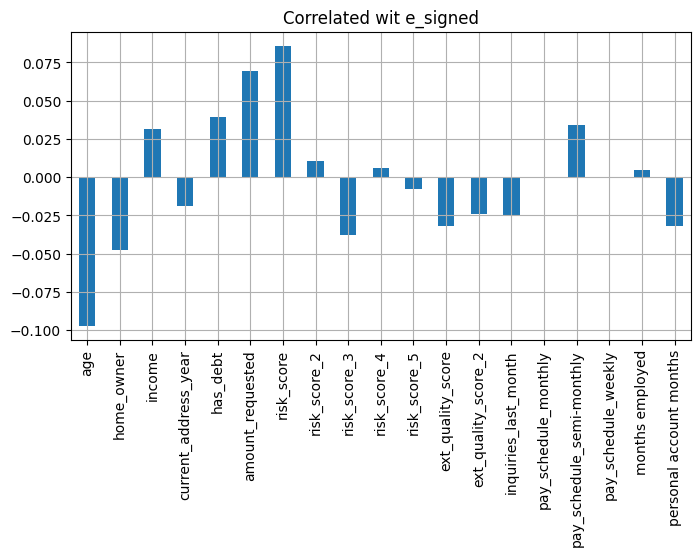

In [ ]:
corr_df.corrwith(df['e_signed']).plot.bar(
    figsize=(8,4),
    title="Correlated wit e_signed",grid=True
)

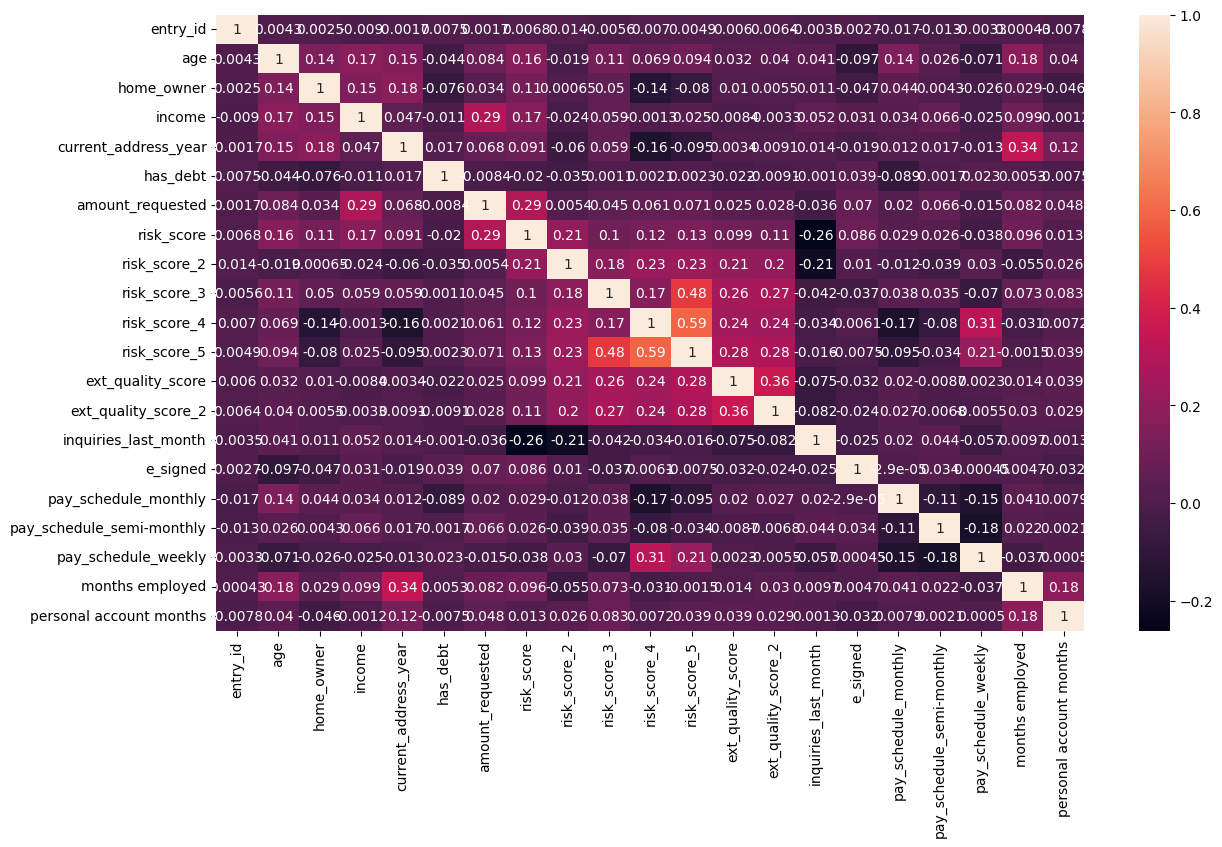

In [ ]:
#heatmap
plt.figure(figsize=(14,8))
ax=sns.heatmap(df.corr(),annot=True)

#Spliting the Dataset

In [ ]:
X=df.drop(columns=['entry_id','e_signed'])
y=df['e_signed']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape,y_train.shape

((14326, 19), (14326,))

In [ ]:
X_test.shape,y_test.shape

((3582, 19), (3582,))

In [ ]:
#Feature Scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-0.00599126, -0.85634884, -0.24235846, ...,  1.97682704,
        -1.4077639 ,  0.36896493],
       [-0.50989022, -0.85634884, -0.05259224, ..., -0.50586115,
         0.35212263, -0.28090617],
       [-0.7618397 ,  1.16774842, -0.41214928, ..., -0.50586115,
        -1.18309754,  0.19566597],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ..., -0.50586115,
        -0.65887602, -1.45067413],
       [ 1.08578982, -0.85634884, -0.69846323, ..., -0.50586115,
         2.41156432,  3.83494409],
       [-0.7618397 , -0.85634884, -0.36554004, ..., -0.50586115,
         0.35212263, -1.27737518]])

In [ ]:
X_test

array([[-1.01378918, -0.85634884, -0.24235846, ..., -0.50586115,
        -1.18309754, -0.32423091],
       [-1.01378918, -0.85634884, -0.33557695, ..., -0.50586115,
        -0.28443207,  0.19566597],
       [ 0.24595822, -0.85634884, -0.59858627, ..., -0.50586115,
         2.86089705, -0.84412778],
       ...,
       [-0.08997442, -0.85634884, -0.41214928, ..., -0.50586115,
         1.06356612,  0.36896493],
       [-0.25794074, -0.85634884, -0.25567539, ..., -0.50586115,
         0.61423339,  0.19566597],
       [-0.08997442, -0.85634884, -0.72176785, ...,  1.97682704,
        -0.28443207,  1.75535659]])

# Choosing the right Models

In [ ]:
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.5628140703517588

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 654, 1000],
       [ 566, 1362]])

In [ ]:
#SVC Model
model2=SVC()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.5946398659966499

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 797,  857],
       [ 595, 1333]])

In [ ]:
#RandomForestClassifier
model3=RandomForestClassifier(random_state=0)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6323283082077052

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 959,  695],
       [ 622, 1306]])

In [ ]:
#XGBOOST Model
model4=XGBClassifier(random_state=0)
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6303740926856505

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 932,  722],
       [ 602, 1326]])

# FineTuning The Hyperparameters

In [ ]:
parameters={
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[2,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.00,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'n_estimators':[100,200,300,400,500],
    'subsample':[0.5,0.7,1.0]
}

In [ ]:
random_cv=RandomizedSearchCV(
    estimator=model4,
    param_distributions=parameters,
    n_jobs=-1,
    scoring='roc_auc',
    n_iter=5,
    verbose=3

)


In [ ]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           num_parallel_tree=None,
                                           random_state=0, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
random_cv.best_params_

{'subsample': 1.0,
 'n_estimators': 400,
 'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [ ]:
random_cv.best_score_

0.7007367692072031

In [ ]:
#XGBOOST Model
model4=XGBClassifier(subsample= 1.0,
 n_estimators= 400,
 min_child_weight= 7,
 max_depth= 5,
 learning_rate= 0.1,
 gamma=0.2,
 colsample_bytree= 0.4)
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6423785594639866

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 962,  692],
       [ 589, 1339]])

# Making A prediction